In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')
import fastai_scans
from fastai.basics import *

path = Path('../data')

In [2]:
bs = 32
vol_size = (16,16,16)

In [3]:
data = (fastai_scans.VolumeItemList.from_paths(path/'x_train', path/'y_train.csv')
                                   .random_split_by_pct(0.2, seed=7)
                                   .label_from_metadata('label')
                                   .transform(fastai_scans.get_transforms())
                                   .databunch(bs=bs)
                                   .normalize())

In [4]:
data

BcolzDataBunch;

Train: LabelList
y: CategoryList (8000 items)
[Category 5, Category 0, Category 0, Category 4, Category 4]...
Path: .
x: VolumeItemList (8000 items)
[Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16)]...
Path: .;

Valid: LabelList
y: CategoryList (2000 items)
[Category 4, Category 9, Category 4, Category 4, Category 1]...
Path: .
x: VolumeItemList (2000 items)
[Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16), Volume (16, 16, 16)]...
Path: .;

Test: None

In [5]:
m = fastai_scans.models.Simple3d(vol_size, ni=1, nf=16, num_layers=3, num_classes=10)
learn = Learner(data, m, metrics=accuracy, path='experiments/classification')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


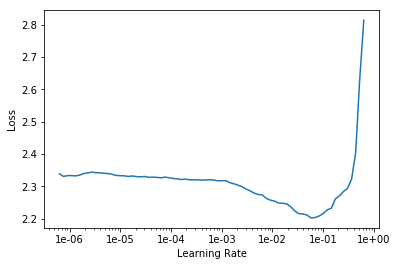

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(10, 4e-3)

epoch,train_loss,valid_loss,accuracy
1,1.732788,1.510533,0.484000
2,1.217617,1.156551,0.595000
3,1.064868,1.085005,0.619500
4,0.973487,0.949164,0.668000
5,0.841880,0.910726,0.678500
6,0.741153,0.823422,0.712000
7,0.631398,0.812166,0.720000
8,0.536607,0.764136,0.743500
9,0.465896,0.766484,0.746500
10,0.431905,0.764838,0.746000


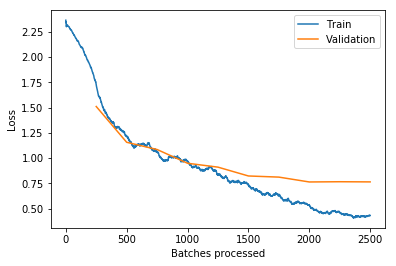

In [8]:
learn.recorder.plot_losses()

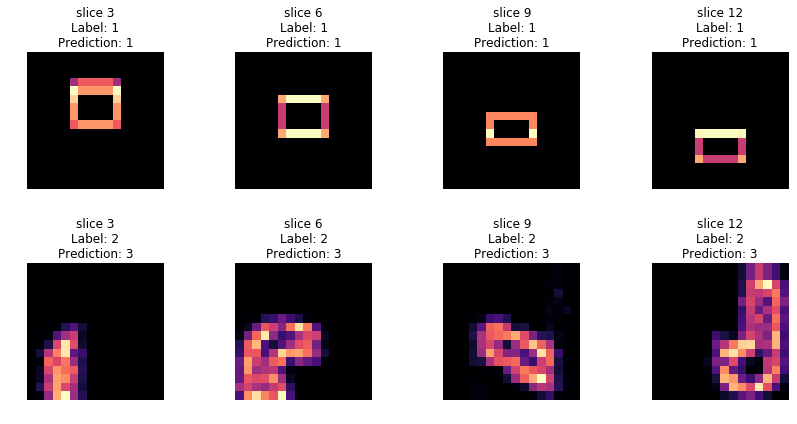

In [12]:
learn.show_results(rows=2)